# The boxcox transformation

In my research 'The empirical rule' we saw bitcoin price data is not normaly distributed. This is inconvienent.
Hopefuly its log-normal and then we could apply the boxcox transformation. (the idea being that log-normal is not to far from normal and the math does not break down as in other power distributions)

https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution

Box-Cox Transformation is a type of power transformation to convert non-normal data to normal data by raising the distribution to a power of lambda (λ). The algorithm can automatically decide the lambda (λ) parameter that best transforms the distribution into normal distribution.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys  
sys.path.insert(0, '..')

from functions import difference_returns, empirical_rule, empirical_rule_quartiles

#standard import bitcoin data
dt        = 900
key_open  = "open" 
key_high  = "high"
key_low   = "low"
key_close = "close"

df = pd.read_csv("../BTCUSD.csv")
df = df[0:100]
print(df)
print(empirical_rule(df['close']))

                   time       low      high      open     close      volume
0   2022-06-01 15:30:00  30710.57  30919.02  30891.60  30755.80  549.939969
1   2022-06-01 15:45:00  30695.00  30848.21  30755.79  30715.32  498.698285
2   2022-06-01 16:00:00  30528.00  30718.94  30715.33  30602.19  653.669947
3   2022-06-01 16:15:00  30366.87  30634.60  30601.93  30375.23  715.812746
4   2022-06-01 16:30:00  30316.29  30462.00  30373.23  30402.63  821.588755
..                  ...       ...       ...       ...       ...         ...
95  2022-06-02 15:15:00  30120.79  30351.09  30194.98  30279.15  496.054962
96  2022-06-02 15:30:00  30184.43  30364.22  30282.62  30290.03  455.413755
97  2022-06-02 15:45:00  30153.36  30340.00  30292.75  30189.65  258.827953
98  2022-06-02 16:00:00  30161.90  30336.70  30189.69  30318.08  216.257057
99  2022-06-02 16:15:00  30162.46  30383.10  30318.07  30240.39  244.385410

[100 rows x 6 columns]
False


In [2]:
from scipy import stats

# we assume brownian motion and calculate the difference deviced by squired delta time
returns = difference_returns(df[key_close], dt)

# drop the first because it will be missing
returns = returns[1:]
returns = returns.sort_values()
print(returns)


19   -13.827000
86   -11.231333
89   -10.675000
13    -8.642333
3     -7.565333
        ...    
16     5.037667
94     5.274333
30     5.319667
90     6.096000
88    12.473667
Name: close, Length: 99, dtype: float64


In [3]:
# for the box-cox transformation all data needs to be positive 
# so we will add the box-cox constant that is equal to the lowest values absolute
box_cox_c = abs(returns.min())
returns_c = returns + box_cox_c
print(returns_c)

19     0.000000
86     2.595667
89     3.152000
13     5.184667
3      6.261667
        ...    
16    18.864667
94    19.101333
30    19.146667
90    19.923000
88    26.300667
Name: close, Length: 99, dtype: float64


[-11.92477924 -11.1515016   -7.98412011  -6.1278719   -5.38329619
  -4.9674162   -3.97705791  -1.60032651   0.26775914   0.86184776
   1.1654105    1.18871411   2.04485216   2.46888916   2.91020296
   3.00652511   3.45674003   3.51834208   3.63743891   4.99063287
   5.03249953   5.23563693   5.25735357   5.43201556   5.49443112
   5.74601084   5.84510129   6.19208544   6.32173731   6.33273357
   6.86068952   6.89093168   6.93668298   7.209455     7.68746068
   7.8751757    8.0050068    8.02516895   8.09091231   8.09913342
   8.26220697   8.36857843   8.5538844    8.62374721   8.89917668
   8.98587806   9.25475612   9.30317059   9.64879821   9.67613483
   9.78327381  10.10154972  10.10612542  10.16333866  10.16486478
  10.29237452  10.40091845  10.68733847  10.76098312  11.2131653
  11.27637555  11.30876579  11.41217047  11.43301761  11.5272653
  11.89343263  12.52718577  12.54512246  12.5466823   12.71917647
  12.76214527  13.55641208  13.78320915  14.609752    14.91250277
  15.1466282

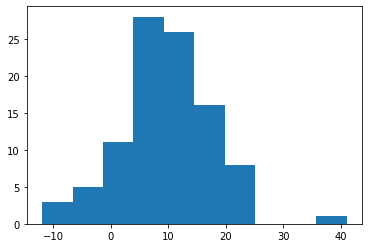

In [7]:
# apply the box-cox transformation
from scipy import stats
xt, lmbda = stats.boxcox(returns_c[1:])
c_xt = xt - box_cox_c
print(c_xt , lmbda)
print(empirical_rule_quartiles(pd.Series(c_xt)))
print(empirical_rule(pd.Series(c_xt )))
plt.hist(c_xt)
plt.show() 